In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
files = glob.glob('../TSP/MIMIC/*.csv')
files.sort()
#Number of Trials
trials = 5
#File name beginining
nb = 17
#File name ending
ne = -10
#Output file
name = '../TSP/tsp.csv'
#Range
r = [5,10,50,100,150,200,250,300]

In [13]:
files

['../TSP/MIMIC/TSP_MIMIC100_50_0.1_1_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.1_2_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.1_3_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.1_4_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.1_5_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.3_1_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.3_2_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.3_3_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.3_4_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.3_5_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.5_1_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.5_2_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.5_3_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.5_4_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.5_5_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.7_1_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.7_2_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.7_3_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.7_4_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.7_5_LOG.csv',
 '../TSP/MIMIC/TSP_MIMIC100_50_0.9_1_LOG.csv',
 '../TSP/MIMI

In [14]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [15]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

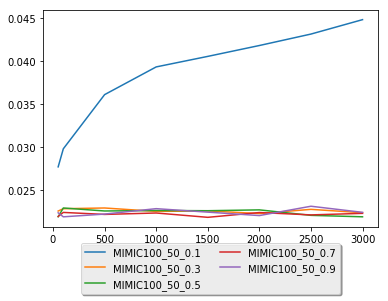

In [16]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

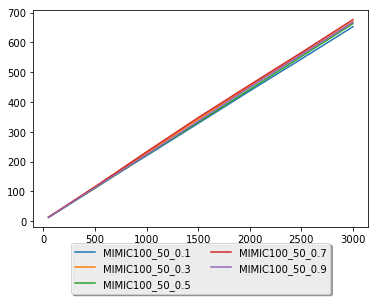

In [17]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [18]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 MIMIC100_50_0.1
1 MIMIC100_50_0.3
2 MIMIC100_50_0.5
3 MIMIC100_50_0.7
4 MIMIC100_50_0.9


In [19]:
#Change this
df = df_concats[0]
df

,iterations,fitness,time,fevals
5,50,0.027653,13.344717,6500
10,100,0.029753,24.133257,12000
50,500,0.036046,112.526959,56000
100,1000,0.039267,219.527289,111000
150,1500,0.040491,328.128663,166000
200,2000,0.041754,436.928456,221000
250,2500,0.043085,544.068147,276000
300,3000,0.044760,652.444247,331000


In [20]:
with open(name, 'a') as f:
    f.write('#MIMIC\n')
    
df.to_csv(name, sep=',', mode='a', header=True)